# **Lesson 12**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import os

In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

In [3]:
# random seed
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

## MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

# Exercise 12.1

Create your DNN choosing an adeuqate value for the number of epochs. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.

## Solution

The aim of this exercise is image recognition: I have downloaded the MNIST dataset and I trained a deep neural network to recognize the handwritten digits in the iages.

In this exercise I modified the given code adjusting the parameters of the NNs, here in particular I tried some different optimizers: 'SGD', 'Adam', 'NAdam', 'Adagrad' and 'RMSProp'.

In [4]:
rows, cols = 28, 28
n_classes = 10

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Before reshaping:')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print()

# reshape data, it could depend on Keras backend
x_train = x_train.reshape(x_train.shape[0], rows*cols)
x_test = x_test.reshape(x_test.shape[0], rows*cols)
print('After reshaping:')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print()

# cast to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# rescale data in interval [0,1]
x_train /= 255
x_test /= 255

print('Before conversion to categorical:')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print()

# convert class vectors to binary class matrices, for use with categorical_crossentropy
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
print('After conversion to categorical:')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


Before reshaping:
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)

After reshaping:
x_train shape: (60000, 784)
x_test shape: (10000, 784)

Before conversion to categorical:
y_train shape: (60000,)
y_test shape: (10000,)

After conversion to categorical:
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [6]:
def create_DNN():
   # instantiate model
   model = Sequential()
   # add a dense all-to-all relu layer
   model.add(Dense(512, input_shape=(rows*cols,), activation='relu'))
   # add a dense all-to-all relu layer
   model.add(Dense(128, activation='relu'))
   # apply dropout with rate 0.5
   model.add(Dropout(0.5))
   # soft-max layer
   model.add(Dense(n_classes, activation='softmax'))
   
   return model


def compile_model(opt = 'SGD'):
   # create the model
   model = create_DNN()
   # compile the model
   model.compile( loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
   return model


def training(data, opt = 'SGD', epochs = 100) :
   # create and compile the model
   model = compile_model(opt)
   history = model.fit(data[0], data[1], batch_size=32, epochs=epochs, verbose=1, validation_data=(data[2], data[3]))

   return model, history

In the NN structure above, we have introduce the `Dropout()` technique, that allows us to switch off randomly a certain percentage of neurons (here the $50\%$) during the training steps. This is a useful technique because it helps preventing the overfitting of the NN. Switching off randomly some neurons, the network will learn to recognize images without relying too much on the interdependence between neurons, and so finding more solid solutions. Note that, during the test phase, the `Dropout()` is not applied, to exploit the full complexity of the model, and this can lead to a value of validation loss that is lower than the training one.

In the last layer of the neural network, the activation function that is called is 'softmax', that takes as input a vector of numbers and converts it to a normalized probability distribution. In fact, some neuron output can be negative, and the sum of all inputs can be different from one, so the 'softmax' activation function allows to interpret the result of this network as a probability.

As loss function we chose the `categorical_crossentropy`, a particular type of loss function adapt to classification problems, such as image recognition.

In [7]:
# training hyperparameters
optimizers = ['SGD', 'Adam', 'NAdam', 'Adagrad', 'RMSProp']
epochs = 100
data = [x_train, y_train, x_test, y_test]

In [8]:
for i in range(4) :
    print(data[i].shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [9]:
# storing models and histories
models = []
histories = []

# training
for opt in optimizers :
    mod, his = training(data, opt, epochs)
    models.append(mod)
    histories.append(his)

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7102 - acc: 0.7943 - val_loss: 0.3034 - val_acc: 0.9173
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3554 - acc: 0.9000 - val_loss: 0.2326 - val_acc: 0.9341
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2884 - acc: 0.9190 - val_loss: 0.1943 - val_acc: 0.9433
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2449 - acc: 0.9304 - val_loss: 0.1689 - val_acc: 0.9500
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2150 - acc: 0.9391 - val_loss: 0.1525 - val_acc: 0.9549
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1935 - acc: 0.9450 - val_loss: 0.1376 - val_acc: 0.9577
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1739 - acc: 0.9508 - val_loss: 0.1247 - val_acc: 0.9613
Epoch 8/100
1875/1875 [==============================] 

In [10]:
# saving models and histories
models_DNN = models
histories_DNN = histories
for m, mod in enumerate(models_DNN) :
    mod.save('DNN/Model_with_' + optimizers[m])

import json
for h, his in enumerate(histories_DNN) :
    with open('DNN/History_with_' + optimizers[h] + '.json', 'w') as f :
        json.dump(his.history, f)


INFO:tensorflow:Assets written to: DNN/Model_with_SGD/assets


INFO:tensorflow:Assets written to: DNN/Model_with_SGD/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_NAdam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_NAdam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adagrad/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adagrad/assets


INFO:tensorflow:Assets written to: DNN/Model_with_RMSProp/assets


INFO:tensorflow:Assets written to: DNN/Model_with_RMSProp/assets


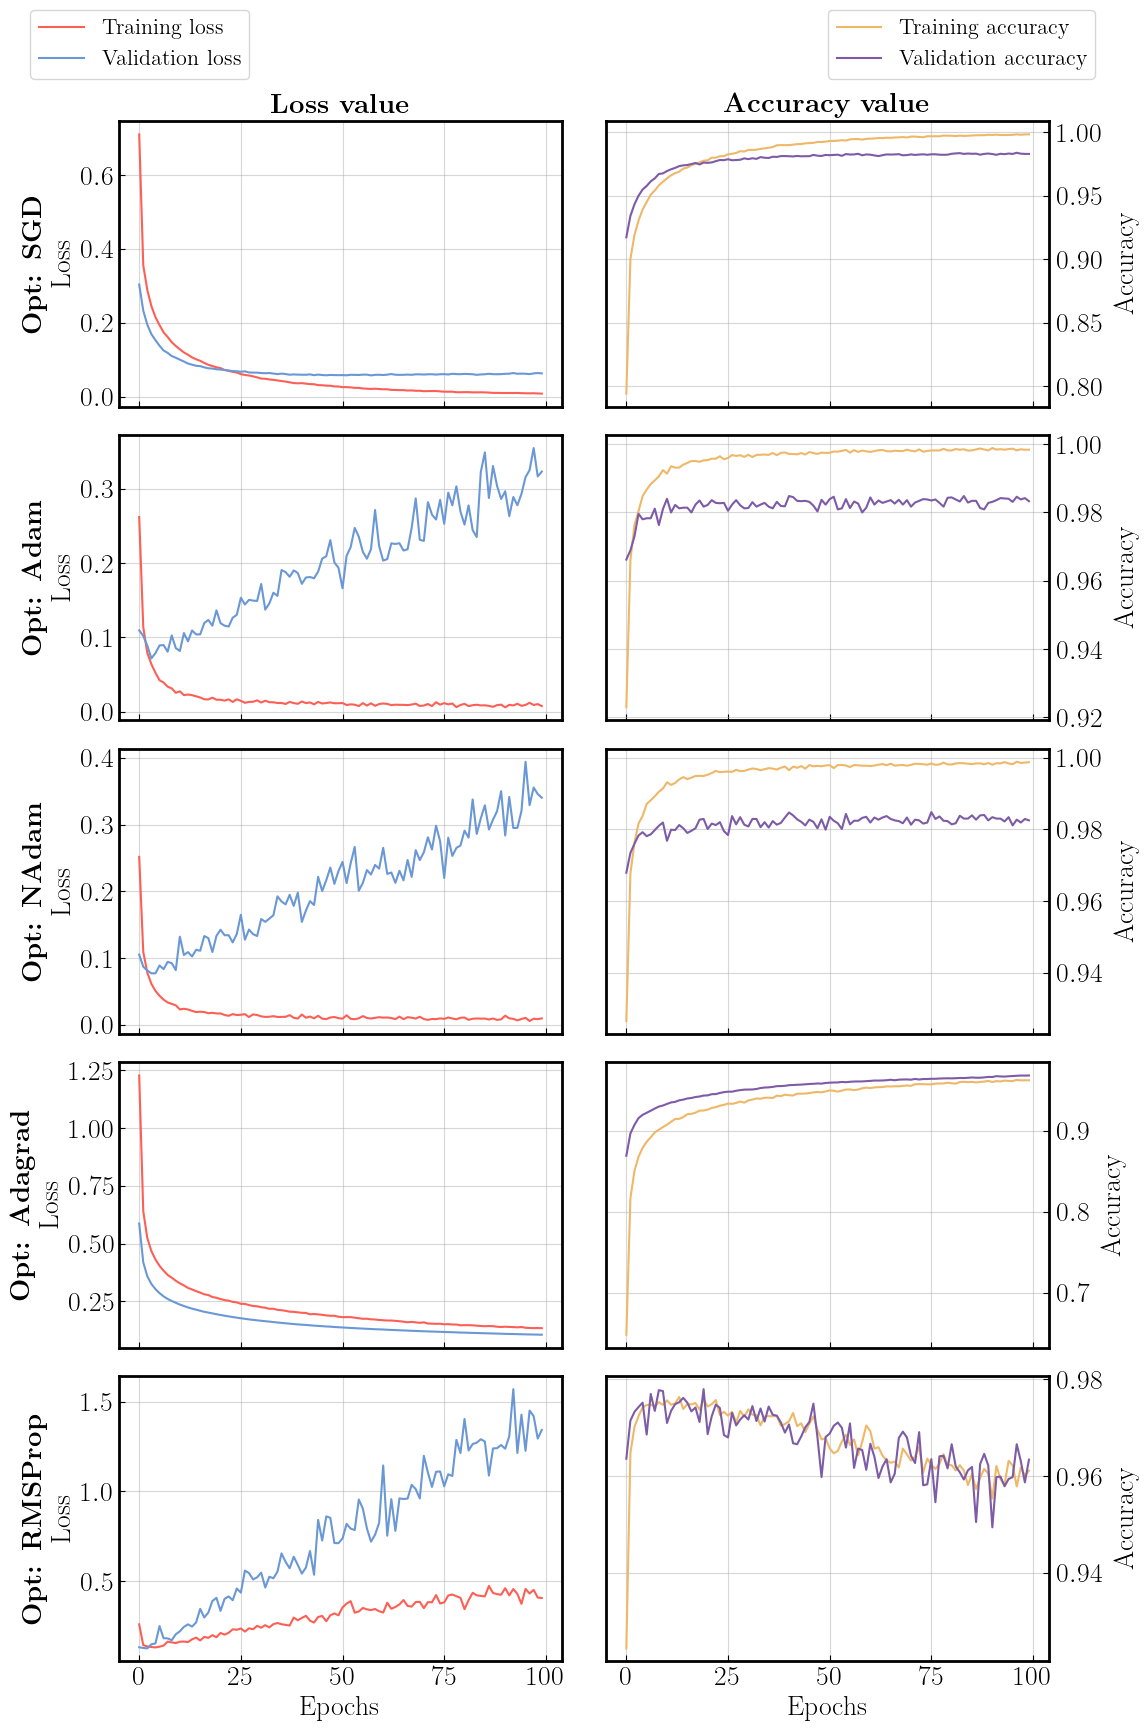

In [24]:
fig, axs = plt.subplots(len(optimizers), 2, figsize=(12,20), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for o, opt in enumerate(optimizers) :
    axs[o,0].plot(histories[o].history['loss'], c='#FE5F55', label='Training loss')
    axs[o,0].plot(histories[o].history['val_loss'], c='#6A97D6', label='Validation loss')
    axs[o,1].plot(histories[o].history['acc'], c='#EEB868', label='Training accuracy')
    axs[o,1].plot(histories[o].history['val_acc'], c='#7D5BA6', label='Validation accuracy')

    axs[o,0].set_ylabel(r'\textbf{Opt: ' +opt+ '} \nLoss')
    axs[o,1].set_ylabel('Accuracy', labelpad=8)
    axs[o,1].yaxis.set_label_position('right')
    axs[o,1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)
    if(o != len(optimizers)-1) :
        axs[o,0].set_xticklabels([])
        axs[o,1].set_xticklabels([])

axs[0,0].set_title(r'\textbf{Loss value}')
axs[0,1].set_title(r'\textbf{Accuracy value}')
axs[0,0].legend(loc=(-0.2,1.15), fontsize=16)
axs[0,1].legend(loc=(0.5,1.15), fontsize=16)
axs[-1,0].set_xlabel('Epochs')
axs[-1,1].set_xlabel('Epochs')

plt.show()

In these plots I showed the values of the losses and of the accuracies of the NN as functions of the number of epochs, for all the optimizers I have tried.

Considering the losses, the best optimizers seem to be 'Adagrad' and 'SGD', for which both the training and the validation losses tend towards zero. For 'Adam' and 'NAdam' the training loss behaves well, but the validation loss grows with time, while 'RMSProp' show a best performance in any case.

The optimizers 'Adagrad', 'SGD', 'Adam' and 'NAdam' show good accuracies, growing with time, and in 'Adagrad' case the validation accuracy is higher than the training one. 'Adam' and 'Nadam' seem to have the highest and most stable accuracies.

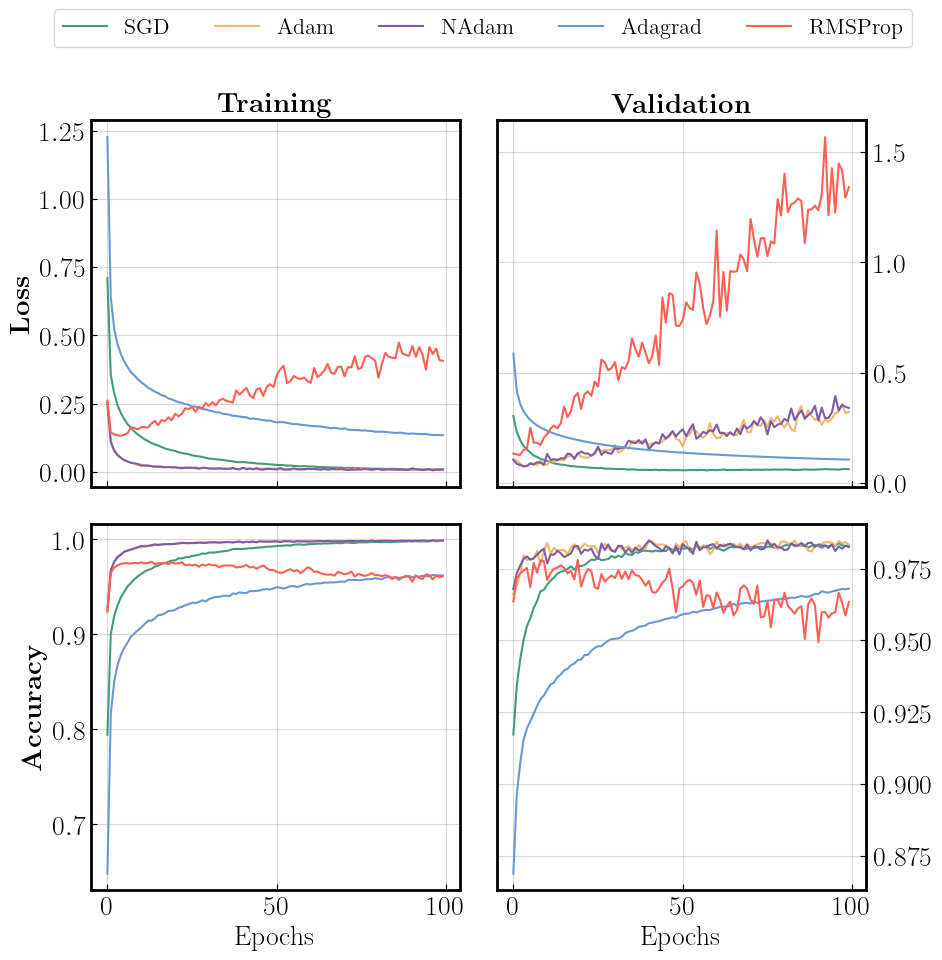

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
colors = ['#419D78', '#EEB868', '#7D5BA6', '#6A97D6', '#FE5F55']

for h, his in enumerate(histories) :
    axs[0,0].plot(his.history['loss'], c=colors[h], label=optimizers[h])
    axs[0,1].plot(his.history['val_loss'], c=colors[h], label=optimizers[h])
    axs[1,0].plot(his.history['acc'], c=colors[h], label=optimizers[h])
    axs[1,1].plot(his.history['val_acc'], c=colors[h], label=optimizers[h])

axs[1,0].set_xlabel('Epochs')
axs[1,1].set_xlabel('Epochs')
axs[0,0].set_ylabel(r'\textbf{Loss}')
axs[1,0].set_ylabel(r'\textbf{Accuracy}')
axs[0,0].set_title(r'\textbf{Training}')
axs[0,1].set_title(r'\textbf{Validation}')

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,1].yaxis.set_label_position('right')
axs[0,1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)
axs[1,1].yaxis.set_label_position('right')
axs[1,1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)
axs[0,0].legend(loc=(-0.1,1.2), fontsize=16, ncol=len(optimizers))

plt.show()

In this plots I compare losses and accuracies for all the optimizers:
- The overall best training losses are the ones of 'Adam', 'NAdam' and 'SGD'
- For the validation loss the best results are the ones of 'SGD' and 'Adagrad', while 'Adam', 'NAdam' probably have overfitted the training dataset
- The best training and validation accuracies are given by 'Adam', 'NAdam' and 'SGD'

It seems that 'RMSProp' does not perform very well in this case.

313/313 [==============================] - 0s 1ms/step


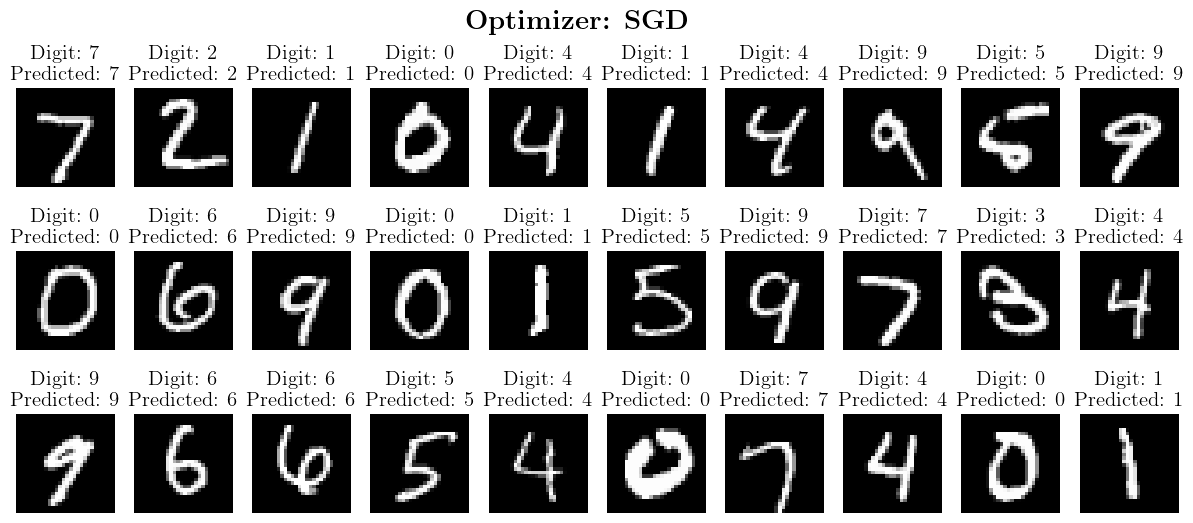

313/313 [==============================] - 0s 799us/step


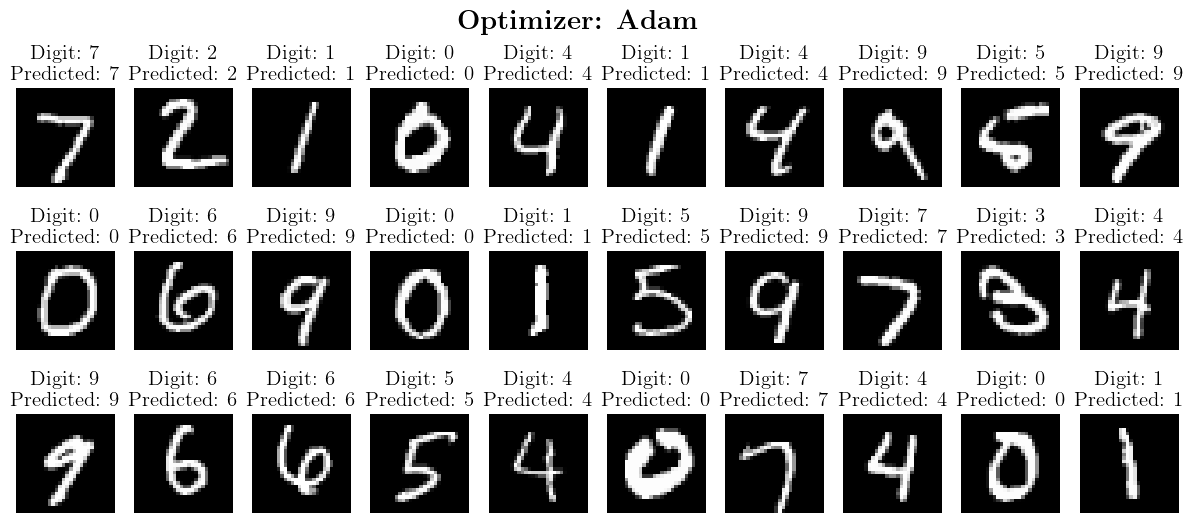

313/313 [==============================] - 0s 781us/step


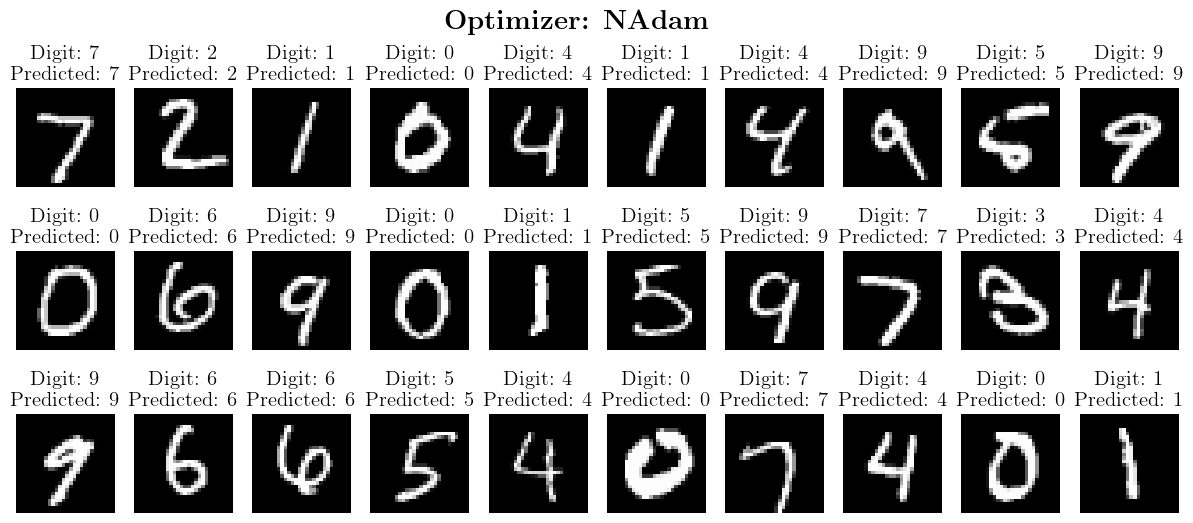

313/313 [==============================] - 0s 800us/step


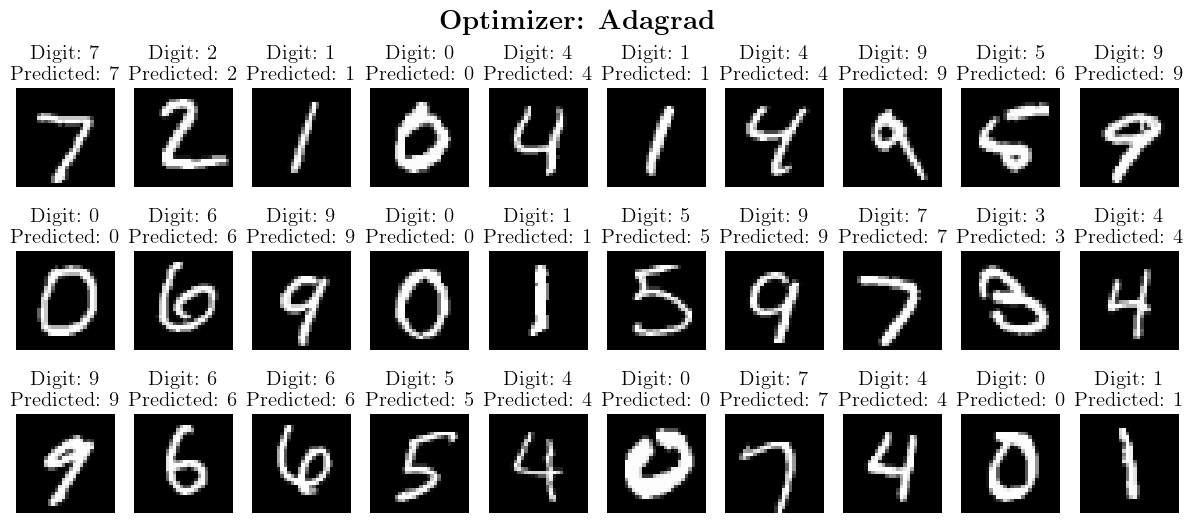

313/313 [==============================] - 0s 814us/step


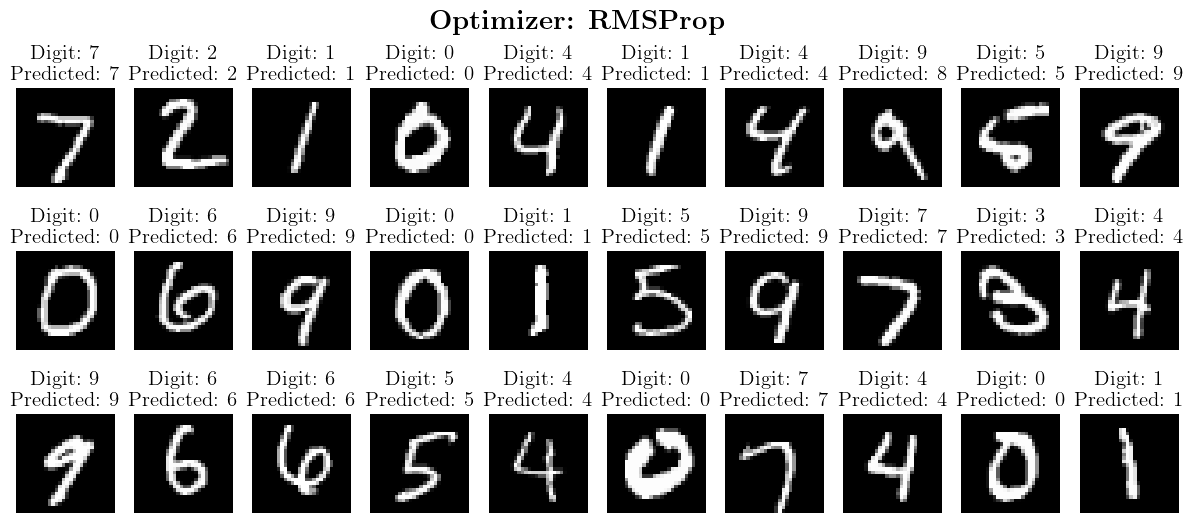

In [13]:
# plot predictions
x_test_pred = x_test
x_test_plot = x_test.reshape((x_test.shape[0], rows, cols, 1))
predictions = []

for o, opt in enumerate(optimizers) :
    plt.figure(figsize=(15,6))
    predictions.append(models[o].predict(x_test_pred))
    for i in range(30) :
        ax = plt.subplot(3, 10, i + 1)    
        plt.imshow(x_test_plot[i, :, :, 0], cmap='gray')    
        plt.title('Digit: ' +str(np.argmax(y_test[i]))+ '\nPredicted: ' +str(np.argmax(predictions[o][i])), fontsize=15)
        plt.axis('off') 
    plt.suptitle(r'\textbf{Optimizer: ' +opt+ '}')
    plt.show()

Above there are shown the prediction made by the deep NN trained with all the optimizers.

# Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **you should complete**:

## Solution

In this exercise I have to transform the previous Deep Neural Network (DNN) into a **Convolutional Neural Network** (CNN). This type of NN are especially useful when processing structured data, such as images, because they are able to learn local features of the datasets and so, for example, they are able to recognize an object in an image independently of its position.

This is possible because in convolutional layers, CNN apply to the initial image a certain number of filters, that sweep over all the image and learn local features. These layers are usually followed by some pooling layers, that reduce the size of the image (i.e. they coarse-grain the image) to focus only on relevant features. Then the information is 'flattened' and the resulting vector is given to a fully-connected neural network, that give the result by increasing the output weight corresponding to the correct class: for example, as we have to classify the images in $10$ classes corresponding to $[0,1,...,9]$, the output layer of the NN would have $10$ neurons, and the one with the greatest output will be the prediction of the network.

Here I explain the main types of layer I used in my CNN building:
- `Conv2D`: this layer applies a $2D$ filter on the image to learn local features.
- `MaxPooling2D`: this layer reduces the size of the image keeping only the higher value of the pixels
- `Dropout`: this operation switches off some neurons to make training more robust
- `Flatten`: this layer converts a $2D$ input into a $1D$ output that is given to a `Desne` layer 
- `Dense`: these are the usual fully-connected layers

I chose 'SGD' as optimizer because it seemed the one with overall best features in the previous analysis.

In [14]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)

print('After reshape:')
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

After reshape:
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [15]:
def create_CNN():
    
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(n_classes, kernel_size=(5, 5), activation='elu', input_shape=input_shape)) # 24 x 24 x 10
    # second convolution with 8 filters
    #model.add(Conv2D(8, kernel_size=(5, 5), activation='elu', input_shape=input_shape))         # 20 x 20 x 8
    # MaxPooling to coarse-grain the image
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))                                   # 12 x 12 x 10
    # second convolution with 16 filters
    model.add(Conv2D(16, kernel_size=(5, 5), activation='elu', input_shape=input_shape))        # 8 x 8 x 16
    # MaxPooling to coarse-grain the image
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))                                   # 4 x 4 x 16
    # Flatten
    model.add(Flatten())
    # Dense layers
    model.add(Dense(256, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['acc'])
    
    return model

In [16]:
# training hyperparameters
epochs = 15

In [17]:
# training the model
CNN = create_CNN()
history = CNN.fit(x_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4525 - acc: 0.8577 - val_loss: 0.1349 - val_acc: 0.9586
Epoch 2/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1613 - acc: 0.9502 - val_loss: 0.0932 - val_acc: 0.9692
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1203 - acc: 0.9623 - val_loss: 0.0687 - val_acc: 0.9777
Epoch 4/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1020 - acc: 0.9682 - val_loss: 0.0590 - val_acc: 0.9811
Epoch 5/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0893 - acc: 0.9720 - val_loss: 0.0569 - val_acc: 0.9815
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0791 - acc: 0.9758 - val_loss: 0.0476 - val_acc: 0.9840
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0724 - acc: 0.9776 - val_loss: 0.0433 - val_acc: 0.9862
Epoch 8/15
1875/1875 [==============================] -

In [18]:
CNN.save('CNN/Model')

history_CNN = history
with open('CNN/History.json', 'w') as f :
    json.dump(history_CNN.history, f)

INFO:tensorflow:Assets written to: CNN/Model/assets


INFO:tensorflow:Assets written to: CNN/Model/assets


313/313 [==============================] - 1s 4ms/step - loss: 0.0303 - acc: 0.9898

Test loss: 0.030291780829429626
Test accuracy: 0.989799976348877



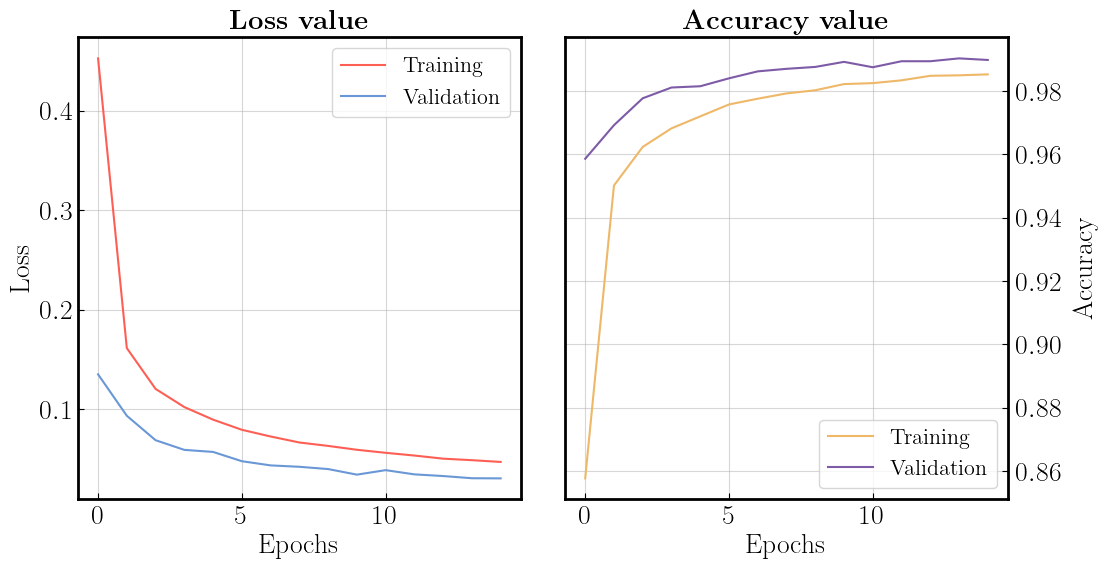

In [26]:
# Evaluate the model
score = CNN.evaluate(x_test, y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# plot
fig, axs = plt.subplots(1, 2, figsize=(12,6), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

axs[0].plot(history_CNN.history['loss'], c='#FE5F55', label='Training')
axs[0].plot(history_CNN.history['val_loss'], c='#6A97D6', label='Validation')
axs[1].plot(history_CNN.history['acc'], c='#EEB868', label='Training')
axs[1].plot(history_CNN.history['val_acc'], c='#7D5BA6', label='Validation')

axs[0].set_ylabel('Loss')
axs[1].set_ylabel('Accuracy', labelpad=8)
axs[1].yaxis.set_label_position('right')
axs[1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)

axs[0].set_title(r'\textbf{Loss value}')
axs[1].set_title(r'\textbf{Accuracy value}')
axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xlabel('Epochs')
axs[1].set_xlabel('Epochs')

plt.show()

This plots show the loss (left) and accuracy (right) values, for training and validation phases. Both seems to be good, with validation loss lower that the training one and validation accuracy higher than the training one.

313/313 [==============================] - 1s 3ms/step


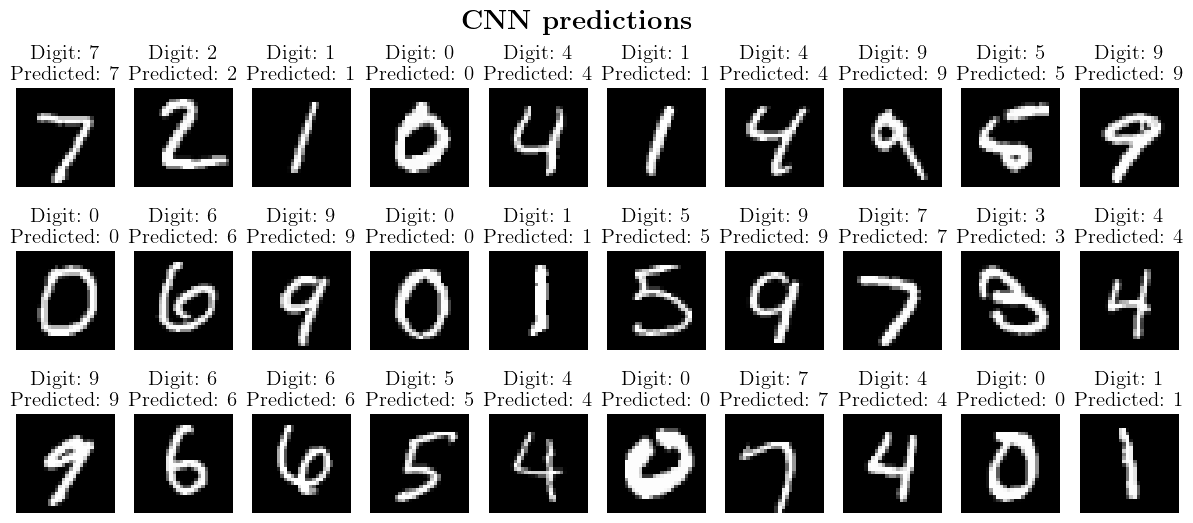

In [29]:
# plot predictions
x_test_pred = x_test
x_test_plot = x_test.reshape((x_test.shape[0], rows, cols, 1))
predictions_CNN = CNN.predict(x_test_pred)


plt.figure(figsize=(15,6))
for i in range(30) :
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test_plot[i, :, :, 0], cmap='gray')    
    plt.title('Digit: ' +str(np.argmax(y_test[i]))+ '\nPredicted: ' +str(np.argmax(predictions_CNN[i])), fontsize=15)
    plt.axis('off') 
plt.suptitle(r'\textbf{CNN predictions}')
plt.show()

### Observations
The results obtained with the CNN are excellent, with only $15$ epochs I have correctly predicted all the digits, obtaining a loss and an accuracy that are comparable to the DNN models trained before for $100$ epochs.

# Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

## Solution

I used `gimp` to generate $10$ handwritten digits, stored in the `Images` folder, to test my CNN.

In [34]:
# load the data from the Images folder
directory = "./Images"
data = []
labels = []

# cycle over all files in the directory
for filename in os.listdir(directory):
	# Construct the full file path
	if filename.endswith('.DS_Store') :
		continue
	file_path = os.path.join(directory, filename)
	
	# open the image and process it
	digit_in = Image.open(file_path).convert('L')
	rows, cols = digit_in.size
	
	pix = digit_in.load()
	values = np.zeros((rows, cols))
	for j in range(cols):
		for i in range(rows):
			values[i, j] = pix[j, i]
	
	values /= 255
	data.append(values)

	# Extract the digit from the filename and append to labels
	if(filename[0] == '4s') :
		digit = 4
	if(filename[0] == '6s') :
		digit = 6
	if (filename[0] == '9s') :
		digit = 9
	if (filename[0] == 'x') :
		digit = 'x'
	else :
		digit = int(filename[0])
	labels.append(digit)


size_data = len(data)


1/1 [==============================] - 0s 17ms/step


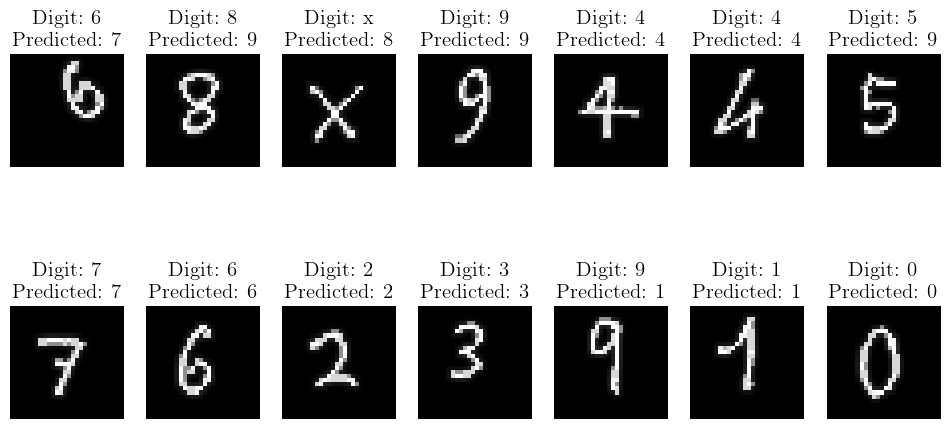

In [36]:
plt.figure(figsize=(12, 6))

for d, dat in enumerate(data):
   # reshape data for prediction 
   dat = dat.reshape(1, rows, cols, 1)
   prediction = CNN.predict(dat)
   # Reshape data for plotting
   dat = dat.reshape(rows, cols)

   ax = plt.subplot(2, 7, d + 1)
   plt.imshow(dat, cmap='gray')
   plt.title('Digit: '+str(labels[d])+ '\nPredicted: ' +str(np.argmax(prediction)), fontsize=15)
   plt.axis('off')

plt.show()

### Observations

The CNN has excellent performances, so I tried to cheat it:
- I wrote '$6$' slightly rotated, and the CNN fails to recognize it
- I wrote 'x', and the CNN predicted '$8$', which centre is similar to an 'x' shape
- I wrote '$4$' and '$9$' in two ways, and the CNN recognized the '$4$' digit, while failed on the '$9$', giving '$1$' as a result, probably because the circle was small ant the digit was narrow anh thin
- The CNN also fails to recognize the '$8$' digit, but in this case I don't know why